# 초중고 위치 데이터 (raw)

In [267]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from toolkit import toolkit
import warnings
warnings.filterwarnings("ignore")

In [1]:
# 한글 폰트 
plt.rcParams['font.family'] = 'Apple SD Gothic Neo' 

NameError: name 'plt' is not defined

In [269]:
path = "/Users/jiwon/portfolio/school-location-based-market-data-analysis/datasets/raw-datasets/school-region.csv"

dt = pd.read_csv(path)

In [270]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11989 entries, 0 to 11988
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   학교ID      11989 non-null  object 
 1   학교명       11989 non-null  object 
 2   학교급구분     11989 non-null  object 
 3   설립일자      11989 non-null  object 
 4   설립형태      11989 non-null  object 
 5   본교분교구분    11989 non-null  object 
 6   운영상태      11989 non-null  object 
 7   소재지지번주소   11989 non-null  object 
 8   소재지도로명주소  11989 non-null  object 
 9   시도교육청코드   11989 non-null  int64  
 10  시도교육청명    11989 non-null  object 
 11  교육지원청코드   11989 non-null  int64  
 12  교육지원청명    11989 non-null  object 
 13  생성일자      11989 non-null  object 
 14  변경일자      11989 non-null  object 
 15  위도        11989 non-null  float64
 16  경도        11989 non-null  float64
 17  데이터기준일자   11989 non-null  object 
dtypes: float64(2), int64(2), object(14)
memory usage: 1.6+ MB


## 분석에 필요한 애트리뷰트

- 학교명
- 학교급구분
- 소재지번주소
- 소재지도로명주소
- 시도교육청
- 위도
- 경도

## 단변수 분석

- 학교명, 소재지번주소, 소재지도로명주소, 위도, 경도는 모두 다르므로 분석을 진행할 이유가 없고 분석하기 어렵습니다.
- 분석에 필요한 애트리뷰트 중 학교급구분, 시도교육청에 대해서만 분석을 진행합니다. 

In [259]:
dt.columns
len(dt.columns)

18

In [260]:
display(dt.head(5))

,학교ID,학교명,학교급구분,설립일자,설립형태,본교분교구분,운영상태,소재지지번주소,소재지도로명주소,시도교육청코드,시도교육청명,교육지원청코드,교육지원청명,생성일자,변경일자,위도,경도,데이터기준일자
0,B000008068,의귀초등학교,초등학교,2/20/59,공립,본교,운영,제주특별자치도 서귀포시 남원읍 의귀리 1483-3,제주특별자치도 서귀포시 남원읍 한신로 213,9290000,제주특별자치도교육청,9299000,제주특별자치도서귀포시교육지원청,11/29/13,7/3/23,33.311119,126.714628,9/22/23
1,B000022613,거제장평중학교,중학교,5/1/13,공립,본교,운영,경상남도 거제시 장평동 148,경상남도 거제시 장평4로 40,9010000,경상남도교육청,9111000,경상남도거제교육지원청,11/29/13,7/3/23,34.886086,128.606467,9/22/23
2,B000022983,연무여자중학교,중학교,4/10/70,사립,본교,운영,충청남도 논산시 연무읍 동산리 879,충청남도 논산시 연무읍 동안로887번길 5,8140000,충청남도교육청,8222000,충청남도논산계룡교육지원청,11/29/13,7/3/23,36.135365,127.104633,9/22/23
3,B000002721,기장초등학교,초등학교,7/1/11,공립,본교,운영,부산광역시 기장군 기장읍 동부리 320,부산광역시 기장군 기장읍 읍내로 69,7150000,부산광역시교육청,7211000,부산광역시해운대교육지원청,11/29/13,7/3/23,35.245772,129.212766,9/22/23
4,B000012154,성일여자고등학교,고등학교,5/1/86,사립,본교,운영,부산광역시 사하구 신평동 60-1,부산광역시 사하구 다대로 161,7150000,부산광역시교육청,7171000,부산광역시서부교육지원청,11/29/13,7/3/23,35.089500,128.980063,9/22/23


In [261]:
# 결측치 확인

dt.isnull().sum()

학교ID        0
학교명         0
학교급구분       0
설립일자        0
설립형태        0
본교분교구분      0
운영상태        0
소재지지번주소     0
소재지도로명주소    0
시도교육청코드     0
시도교육청명      0
교육지원청코드     0
교육지원청명      0
생성일자        0
변경일자        0
위도          0
경도          0
데이터기준일자     0
dtype: int64

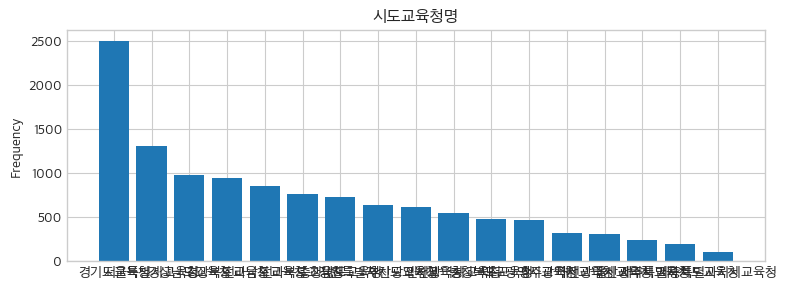

시도교육청명: 
 경기도교육청        2499
서울특별시교육청      1313
경상남도교육청        984
경상북도교육청        939
전라남도교육청        853
전라북도교육청        766
충청남도교육청        726
강원특별자치도교육청     642
부산광역시교육청       617
인천광역시교육청       542
충청북도교육청        479
대구광역시교육청       467
광주광역시교육청       315
대전광역시교육청       303
울산광역시교육청       243
제주특별자치도교육청     200
세종특별자치시교육청     101
Name: 시도교육청명, dtype: int64


In [262]:
toolkit.bar_plot(dt, '시도교육청명')

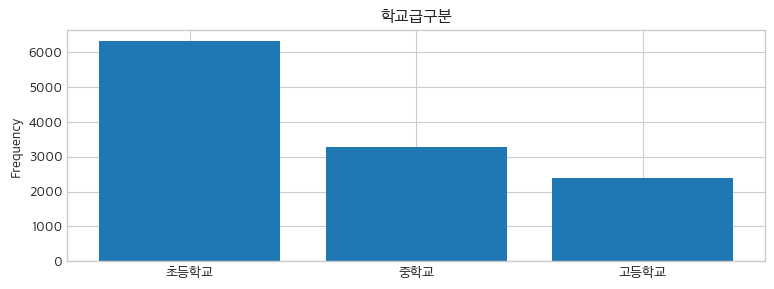

학교급구분: 
 초등학교    6319
중학교     3283
고등학교    2387
Name: 학교급구분, dtype: int64


In [263]:
# 전체 데이터에서 학교급 분포도

toolkit.bar_plot(dt, "학교급구분")

In [264]:
dt["교육지원청명"].describe()

count           11989
unique            177
top       경상남도창원교육지원청
freq              228
Name: 교육지원청명, dtype: object

In [186]:
dt[["학교급구분", "시도교육청명"]]

,학교급구분,시도교육청명
0,초등학교,제주특별자치도교육청
1,중학교,경상남도교육청
2,중학교,충청남도교육청
3,초등학교,부산광역시교육청
4,고등학교,부산광역시교육청
...,...,...
11984,고등학교,광주광역시교육청
11985,중학교,경상북도교육청
11986,초등학교,경기도교육청
11987,중학교,경상남도교육청


서울시에 위치한 학교 주변 상권에 대해 분석할 예정이므로 서울특별시교육청 소속 학교 데이터만 추출합니다. 

In [194]:
# 서울특별시교육청 소속 학교 데이터

dt_seoul = dt[dt["시도교육청명"] == "서울특별시교육청"]

In [192]:
dt_seoul[["학교명", "학교급구분"]].head()

,학교명,학교급구분
7,대영고등학교,고등학교
11,서울양동초등학교,초등학교
22,서울동작초등학교,초등학교
23,서울문영여자고등학교,고등학교
24,서울갈산초등학교,초등학교


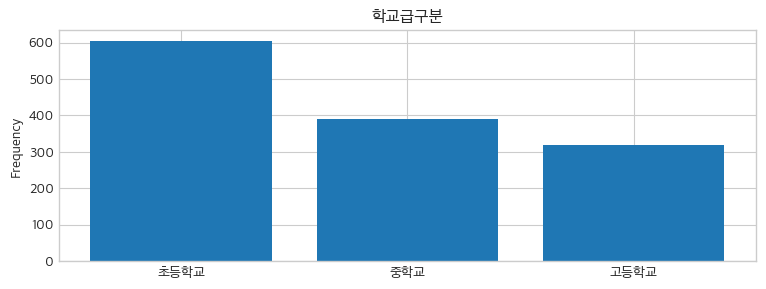

학교급구분: 
 초등학교    604
중학교     389
고등학교    320
Name: 학교급구분, dtype: int64


In [196]:
# 서울에 위치한 학교들 중 초, 중, 고등학교의 분포도

toolkit.bar_plot(dt_seoul, "학교급구분")